# End-to-End Machine Learning Project

#### As a data scientist in a real estate company those are the main steps you will go through:
1. - Look at the big picture
2. - get the data
3. - Discover and visualize the data to gain insights
4. - Prepare the data for Machine Learning algorithms
5. - Select a model and train it
6. - Fine-tune your model
7. - Present the solutiopn
8. - Launch, monitor, and maintain your system

# Look at the big picture
We will build a model of housing prices in California using the California census data.
This data has metrics such as the population, median income, median housing price, and so on.

### 1-2. Define the objective in business terms and how will your solution be used?:
The model's output will be fed to another ML system. This downstream system will determine wether it is worth investing in a given area or not.


### 3. What are the current solutions (if any)?
The district housing prices are currently estimated manually by experts.


### 4. how should you frame this problem?
It is a typical supervised learning task since you have given labeled data and it is also a typical regression task, since you are asked to predict a value.
More specifically this is multivariate regression problem since the system will use multiple features.


### 5. How should the performance be measured?
A typical performance measure for regression problems is the Root Mean Square Error (RMSE)
$$RMSE(X,h) = \frac{1}{m}\sum_{i=0}^m \ \sqrt{(h(x^i)-y^i)^2} $$

or you can use the Mean Absolute Error (MAE)
$$MAE(X,h) = \frac{1}{m}\sum_{i=0}^m \ | h(x^i)-y^i | $$

RMSE is more sensitive to outliers than the MAE, but when outliers are rare, the RMSE performs very well and is generally preferred.

### Last. Verify assumptions if possible

# Get the Data
This is where our dataset comes from: https://github.com/ageron/handson-ml/tree/master/datasets/housing

### Setup

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# commons
import os
import numpy as np

# datascience
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# to make this notebook's output stable across runs
np.random.seed(16)

### Download and extract the data

In [2]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    # if the dataset has been already downloaded it won't create again its directory
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    # get request to https://github.com/ageron/handson-ml/blob/master/datasets/housing/housing.tgz
    urllib.request.urlretrieve(housing_url, tgz_path)
    #extract the dataset
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()

### Create a DataFrame with the .csv file downloaded

In [4]:
def load_data(housing_path = HOUSING_PATH):
    path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(path)

housing = load_data()

### Quick look at the data structure with head(), info() and describe()
There are:
- 10 attributes:
    - longitude
    - latitude
    - housing_median_age
    - total_rooms
    - total_bedrooms
    - population
    - households
    - median_income
    - median_house_value
    - ocean_proximity
- 20640 entries

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11337d390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1140898d0>]], dtype=object)

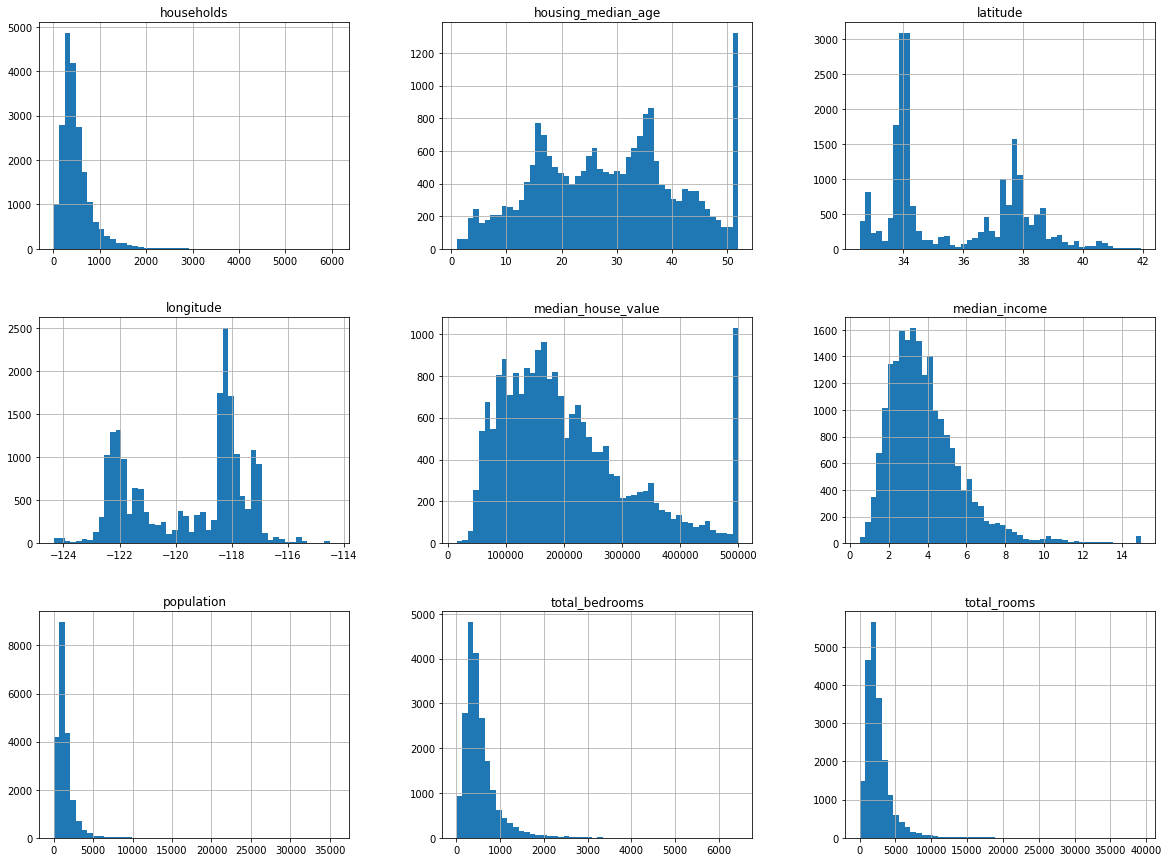

In [10]:
housing.hist(bins = 50, figsize = (20,15))

### Before going any further, you need to create a test set!

In [12]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(housing, test_size = 0.2, random_state = 16)

#### Suppose that you talked with experts who told you that median income is a very important attribute to predict median housing prices. You may what to ensure that the test set is representative of the various categories of incomes in the whole dataset.

In [14]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace = True)

#### Now you are ready to do stratified sampling based on the income category

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 16)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_data = housing.loc[train_index]
    strat_test_data = housing.loc[test_index]

In [16]:
housing['income_cat'].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [17]:
# remove the 'income_cat'
for set_ in (strat_train_data, strat_test_data):
    set_.drop('income_cat', axis=1, inplace = True)

# Discover and Visualize the Data to Gain Insights

In [18]:
# lets create a copy so you can play with it without harming the training set
housing = strat_train_data.copy()

### Visualizing Geographical Data

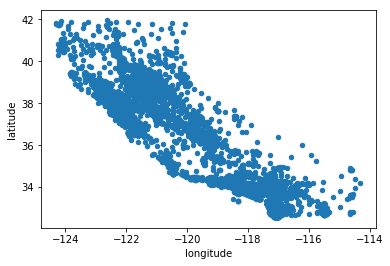

In [20]:
# Scatter plot of all districts to visualize the data
housing.plot(kind='scatter', x = 'longitude', y = 'latitude')

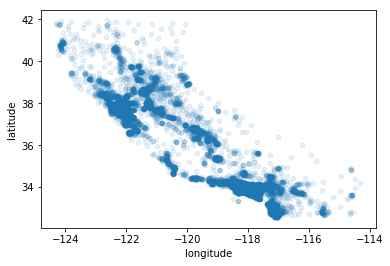

In [21]:
# set alpha = 0.1 to visualize the places where there is a high density of data points
housing.plot(kind='scatter', x = 'longitude', y = 'latitude', alpha = 0.1)

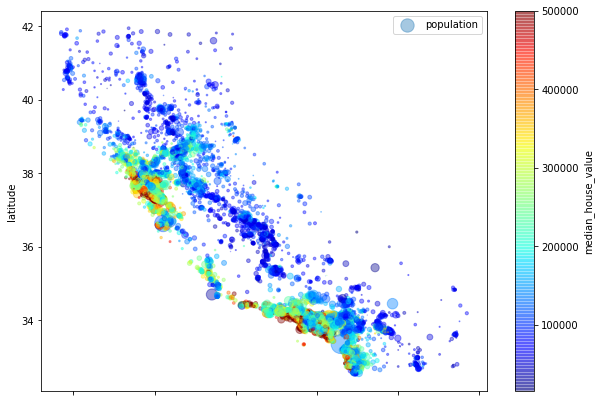

In [24]:
# the radius of each circle represents the population and the color the price
housing.plot(kind='scatter', x = 'longitude', y = 'latitude', 
             alpha = 0.4, s = housing['population']/100, label = 'population',
             c = 'median_house_value', cmap = plt.get_cmap('jet'), 
             colorbar = True, figsize = (10,7))

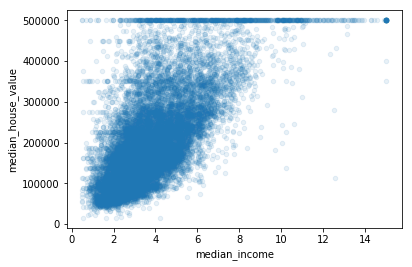

In [26]:
# the price caps could be a problem
housing.plot(kind='scatter', x = 'median_income', y = 'median_house_value', alpha = 0.1)

## Experimenting with Attribute Combinations

In [28]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [29]:
corr = housing.corr()
corr['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.685987
rooms_per_household         0.147988
total_rooms                 0.130543
housing_median_age          0.102567
households                  0.063758
total_bedrooms              0.047894
population_per_household   -0.021822
population                 -0.025967
longitude                  -0.042139
latitude                   -0.147876
bedrooms_per_room          -0.251523
Name: median_house_value, dtype: float64

#### this is not bad! bedrooms_per_room is more correlated to median_house_value than total_rooms and total_bedrooms and the same is for rooms_per_household

# Prepare the Data for the Machine Learning Algorithms

### lets revert the dataset

In [31]:
housing = strat_train_data.drop('median_house_value', axis = 1)
housing_labels = strat_train_data['median_house_value']

## Data Cleaning
#### Missing Features: 
- Get rid of the corresponding districts.
- Get rid of the whole attribute.
- Set the values to some value (zero, the mean, the median, etc.).

In [32]:
housing.dropna(subset=['total_bedrooms']) # option1
housing.drop('total_bedrooms', axis = 1) # option2
median = housing['total_bedrooms'].median() # option3
housing['total_bedrooms'].fillna(median, inplace = True)

#### Scikit-Learn provides a handy class to take care of missing values: Imputer

In [33]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy = 'median')

In [34]:
# since the median che only be computed on numerical attributes, 
# we need to create a copy of the data without the text attribute ocean_proximity
housing_num = housing.drop('ocean_proximity', axis = 1)

In [35]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [39]:
print("The medians computed by the imputer: \n", imputer.statistics_)
print("\nThe medians : \n", housing_num.median().values)

The medians computed by the imputer: 
 [ -118.48      34.25      29.      2127.       434.      1164.       409.
     3.5343]

The medians : 
 [ -118.48      34.25      29.      2127.       434.      1164.       409.
     3.5343]


In [41]:
# now you can you the trained imputer to trasform the training set
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

## Handling Text and Categorical Attributes
#### Scikit-Learn provides a transformer for this task called LabelEncoder

In [42]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [43]:
housing_cat = housing['ocean_proximity']

housing_cat_encoded = encoder.fit_transform(housing_cat)

housing_cat_encoded

array([1, 0, 4, ..., 0, 1, 0])

In [44]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


#### Another way is to use a OneHotEncoder to convert integer categorical values into one-hot vectors

In [47]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

In [49]:
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [50]:
housing_cat_1hot.toarray()

array([[ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       ..., 
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.]])

In [73]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, do not try to understand it (yet).

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out
        
#from sklearn.preprocessing import CategoricalEncoder # in future versions of Scikit-Learn

cat_encoder = CategoricalEncoder()
housing_cat_reshaped = housing_cat.values.reshape(-1, 1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [74]:
cat_encoder = CategoricalEncoder(encoding="onehot-dense")
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

array([[ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       ..., 
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.]])

In [75]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)]

#### We can combine both operations (LabelEncoder and OneHotEncoder) in one shoot with the LabelBinarizer

In [52]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()

In [53]:
housing_cat_1hot = encoder.fit_transform(housing_cat)

housing_cat_1hot

array([[0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ..., 
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0]])

## Custom Transformers

In [55]:
from sklearn.base import BaseEstimator, TransformerMixin

# feature indexes
rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): #no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y = None):
        return self # nothing else to do
    
    def transform(self, X, y = None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, 
                          bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attribs = attr_adder.transform(housing.values)

## Feature Scaling
Machine Learning algorithms don't perform well when the input numerical attributes have very different scales
Two common ways for feature scaling:
- min-max scaling
- standardization

#### Min-max scaling (or normalization) is quite simple: 
- values are shifted and rescaled so that they range from 0 to 10
- Scikit-Learn provides MinMaxScaler with a feature_range hyperparameter that let's you change if you don't want 0-1

#### Standardization is quite different:
- How it works:
  - It subtracts the mean value
  - Then, it divides by the variance so that the resulting distribution has unit variance
- It doesn't bound values to a specific range
- It is much less affected by outliers
- Scikit-Learn provides StandardScaler

## Transformation Pipelines

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', Imputer(strategy='median')),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler())
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [58]:
# we should feed a Pandas DataFrame directly into our pipeline, 
# instead of having to first manually extract the numerical columns into a NumPy array
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [76]:
num_attribs = list(housing_num)
cat_attrib = ['ocean_proximity']

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy='median')),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler())
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attrib)),
        ('categorical_encoder', CategoricalEncoder())
    ])

from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list = [
        ('num_pipeline', num_pipeline),
        ('cat_pipeline', cat_pipeline)
    ])

In [90]:
housing = strat_train_data.drop('median_house_value', axis = 1)
housing_labels = strat_train_data['median_house_value']

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

(16512, 16)

## Select and Train a Model

### Training and Evaluation on the Training Set

#### Linear Regression Model

In [91]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
# lets try it out
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

print("Predictions: ", lr.predict(some_data_prepared))
print("Labels: ", list(some_labels))

Predictions:  [  75271.96838676  238943.66715015  326614.60618825  114326.37650393
  323222.92073406]
Labels:  [131900.0, 182100.0, 406200.0, 95500.0, 388300.0]


##### Measure this regression model's RMSE

In [94]:
from sklearn.metrics import mean_squared_error

predictions = lr.predict(housing_prepared)
lr_rmse = np.sqrt(mean_squared_error(housing_labels, predictions))
lr_rmse

# we are underfitting the data!

68488.512011549465

### Decision Tree Regressor Model

In [99]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(housing_prepared, housing_labels)

predictions = dtr.predict(housing_prepared)
dtr_rmse = np.sqrt(mean_squared_error(housing_labels, predictions))
dtr_rmse

# is it overfitting???

0.0

### Better Evaluation Using Cross-Validation
Scikit-Learn provides the K-fold cross-validation: it randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates teh Decision Tree model 10 times picking a differente fold for evaluation every time and training on the other 9 folds

In [102]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(dtr, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv = 10)

tree_rmse_scores = np.sqrt(-scores)

In [103]:
def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard deviation: ', scores.std())

In [104]:
print('DecisionTreeRegressor Scores')
display_scores(tree_rmse_scores)

Scores:  [ 71638.9008648   69443.72853938  74355.98419515  68564.70653063
  71429.2085364   65650.29208648  67411.69570294  73600.69711566
  70770.14202486  71172.11955779]
Mean:  70403.7475154
Standard deviation:  2549.39006224


##### The decision tree regressor is overfitting so badly that it performs worse than the linear regression model

In [105]:
scores = cross_val_score(lr, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv = 10)

lr_rmse_scores = np.sqrt(-scores)

print('LinearRegression Scores')
display_scores(lr_rmse_scores)

LinearRegression Scores
Scores:  [ 68153.94286674  68603.34398405  70372.70557626  67097.04067213
  67309.54218413  67690.55053115  67749.93457537  71841.55516552
  70138.10109846  70003.55400283]
Mean:  68896.0270657
Standard deviation:  1509.38462195


### Random Forest Model
Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their predictions. Building a model on top of many other models is called Ensemble Learning

In [106]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(housing_prepared, housing_labels)

scores = cross_val_score(rfr, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv = 10)

rfr_rmse_scores = np.sqrt(-scores)

print('RandomForestRegressor Scores')
display_scores(rfr_rmse_scores)

RandomForestRegressor Scores
Scores:  [ 52529.81176096  54733.93178909  53983.69644596  49483.8049502
  52368.57836799  47395.6422572   51186.7583371   54605.3020836
  53705.80452666  52825.16545069]
Mean:  52281.8495969
Standard deviation:  2227.1634198


# Fine-Tune your Model

## Grid Search

In [107]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5,
                          scoring = 'neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [108]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [109]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [110]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)
    
# check out the RandomizedSearchCV

64000.4820116 {'max_features': 2, 'n_estimators': 3}
54677.3345013 {'max_features': 2, 'n_estimators': 10}
52572.4235099 {'max_features': 2, 'n_estimators': 30}
59631.6424567 {'max_features': 4, 'n_estimators': 3}
51965.7915027 {'max_features': 4, 'n_estimators': 10}
50301.3100956 {'max_features': 4, 'n_estimators': 30}
58475.1397035 {'max_features': 6, 'n_estimators': 3}
52043.8087867 {'max_features': 6, 'n_estimators': 10}
49749.2885979 {'max_features': 6, 'n_estimators': 30}
59245.2088898 {'max_features': 8, 'n_estimators': 3}
52156.6169829 {'max_features': 8, 'n_estimators': 10}
49750.8265759 {'max_features': 8, 'n_estimators': 30}
62408.355001 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54050.3946439 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59302.3833251 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52593.1186677 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
58707.0303703 {'bootstrap': False, 'max_features': 4, 'n_estima

## Analyze the Best Models and their Errors

In [111]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([ 0.08021085,  0.07025857,  0.04062962,  0.01654282,  0.01599481,
        0.01818507,  0.01596844,  0.30511142,  0.0573942 ,  0.10672935,
        0.09038595,  0.01316997,  0.16084692,  0.0003522 ,  0.00271823,
        0.00550156])

In [112]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

sorted(zip(feature_importances, attributes),  reverse = True)

[(0.30511141916184442, 'median_income'),
 (0.16084691889571537, 'INLAND'),
 (0.10672934520234034, 'pop_per_hhold'),
 (0.090385953967245608, 'bedrooms_per_room'),
 (0.080210847977834732, 'longitude'),
 (0.070258570832351458, 'latitude'),
 (0.057394204450752259, 'rooms_per_hhold'),
 (0.040629624105687191, 'housing_median_age'),
 (0.018185074252285383, 'population'),
 (0.016542824425765584, 'total_rooms'),
 (0.01599481084053302, 'total_bedrooms'),
 (0.015968439435431268, 'households'),
 (0.013169970517186087, '<1H OCEAN'),
 (0.0055015586973818824, 'NEAR OCEAN'),
 (0.0027182339739890652, 'NEAR BAY'),
 (0.0003522032636563616, 'ISLAND')]

## Evaluate your System on the Test Set

In [115]:
final_model = grid_search.best_estimator_

test_x = strat_test_data.drop('median_house_value', axis = 1)
test_y = strat_test_data['median_house_value'].copy()

test_x_prepared = full_pipeline.transform(test_x)


final_predictions = final_model.predict(test_x_prepared)

final_model_rmse = np.sqrt(mean_squared_error(test_y, final_predictions))
final_model_rmse

48723.380552075403